In [1]:
import sys
sys.path.append('d:\\QUANT_GAME\\python_game\\factor\\factor_lab\\analyze_note')
from analyze_factor_note_init import AnalyzeFactorNotes as Note

---

### 初始化条件

In [2]:
factor_name = 'mean_price'
start_date = 20100101
end_date = 20210101
med_tf = False
z_score_tf = False
demean_tf = False
sample_num = None
sample_every_date_tf = False

In [3]:
note = Note(factor_name, start_date, end_date,
                med_tf, z_score_tf, demean_tf,
                sample_num,sample_every_date_tf
            )

#### 加载数据

In [4]:
note.load_data()

---

#### 查看因子相关信息

##### - 因子定义及计算公式

因子名称：价格移动均值因子(mean_price)   
因子定义：根据时间窗口$\delta_t$的移动，移动步长为1个时间单位，计算算时间窗口$\delta_t$内价格的均值,并且为了统一量纲，对平均价格除以$price_t$
$$
meanprice_{(t-\delta_t+1,t)} = \frac{\sum_{t-\delta_t+1}^{t} price_i}{\delta_t}
$$

$$
factor = \frac{meanprice_{(t-\delta_t+1,t)}}{price_t}
$$

#### -因子信息

In [5]:
factor_info = note.get_factor_info()
for k,v in factor_info.items():
    print(k,':',v)

name : mean_price
fields : ['close']
other_dIepend_factors : None
calc_params : {'delta_period': 5}
save_h5_path : F:\factor_lab_res\prepared_data\factor_data.h5
value_range : [0.23628624647389132, 8.500977384172252]
process_suggest_method : None


---

### 因子分析

In [6]:
note.get_data_for_analysis()

In [7]:
zy_fa = note.analysis_factor()

#### 绘制factor-return散点图

- 全部数据

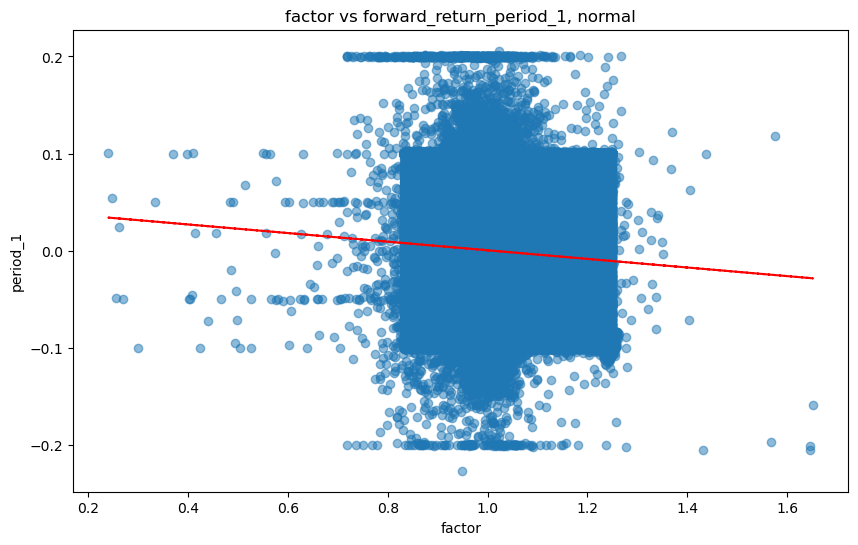

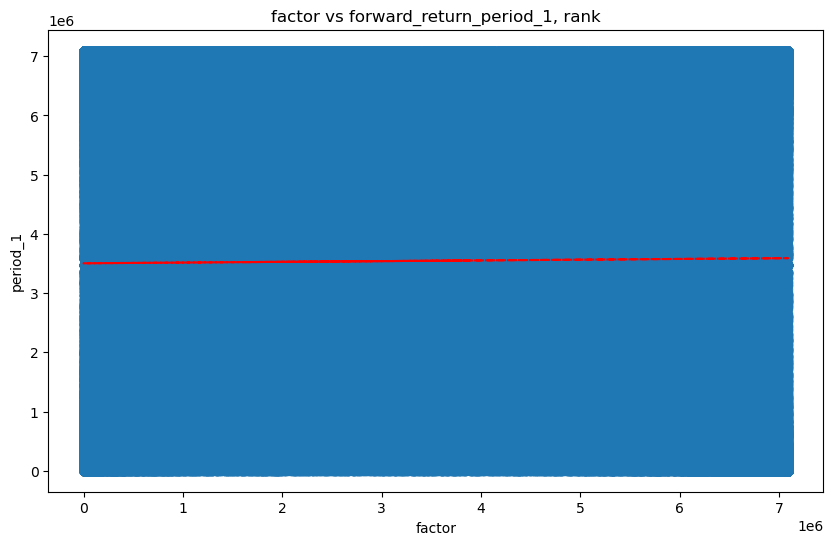

In [8]:
# normal
zy_fa.plot_scatter_and_regression(periods_list=[1,],sample_num=None)
# rank
zy_fa.plot_scatter_and_regression(periods_list=[1,],rank_tf=True,sample_num=None)

- 抽样100000

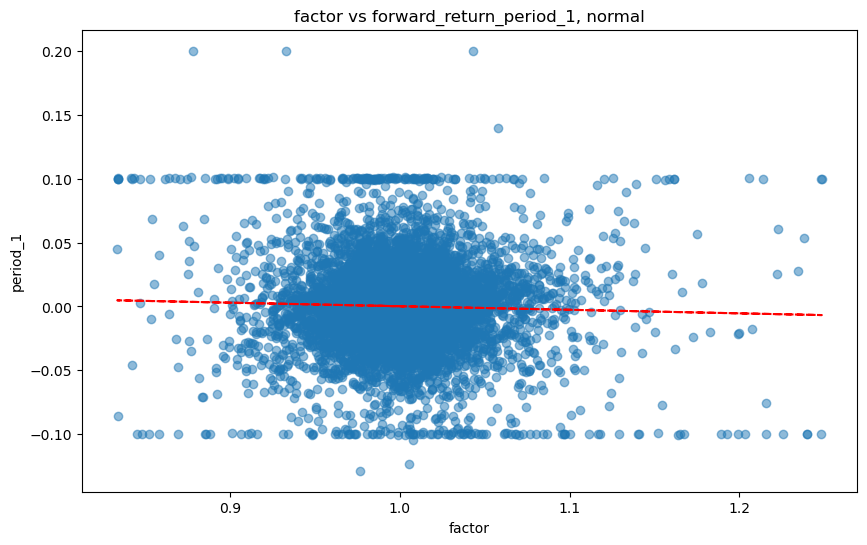

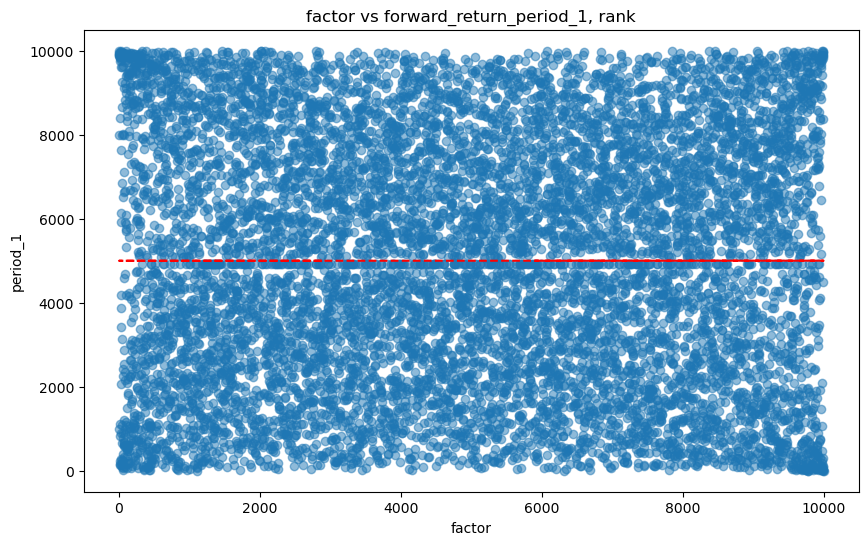

In [9]:
# normal
zy_fa.plot_scatter_and_regression(periods_list=[1,],sample_num=10000)
# rank
zy_fa.plot_scatter_and_regression(periods_list=[1,],rank_tf=True,sample_num=10000)

### 绘制因子分布图

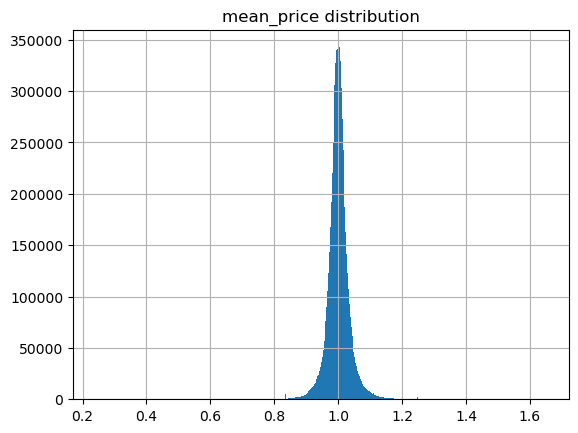

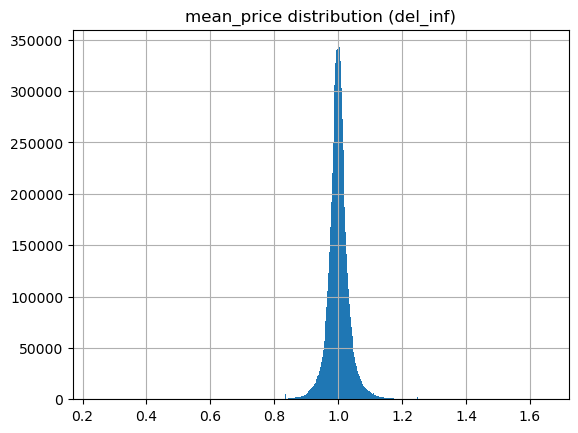

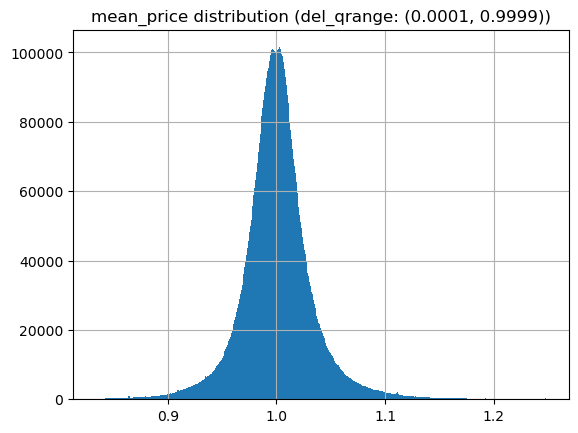

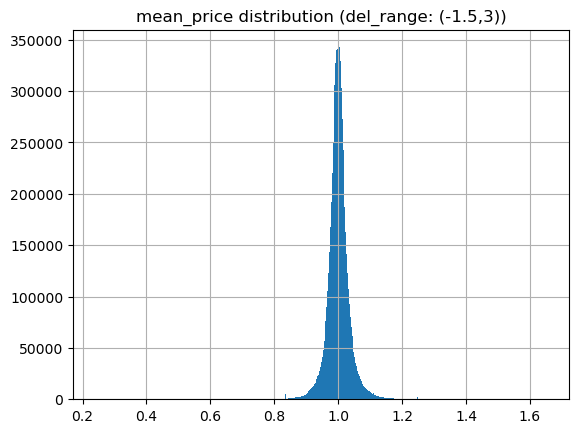

In [10]:
# 原始因子分布图
zy_fa.plot_factor_hist()
# 剔除inf后的因子分布图
zy_fa.plot_factor_hist(del_inf=True)
# 截取分位数qrange的因子分布图
zy_fa.plot_factor_hist(del_qrange=(0.0001,0.9999))
# 截取给定range的因子分布图
zy_fa.plot_factor_hist(del_range=(-1.5,3))

---

#### IC

#### 打印因子ic分析结果

In [11]:
analyze_ic_res = zy_fa.analyze_ic_res()
print('analyze_ic_res:\n',analyze_ic_res)


analyze_ic_res:
                       period_1  period_2  period_3  period_5  period_8  \
norm_ic_mean         -0.031919 -0.015543  -0.00706  0.007752 -0.000228   
norm_ic_std            0.12959  0.122303  0.117107  0.114932  0.108648   
norm_ic_0.02_percent  0.868736  0.856769  0.857143   0.84742  0.835826   
norm_ic_t                  NaN       NaN       NaN       NaN       NaN   
norm_ir               -0.24631 -0.127083 -0.060286  0.067447 -0.002102   
norm_abs_ic          -0.051295 -0.032927 -0.024261 -0.009176 -0.011679   
rank_ic_mean          0.039053  0.042328  0.045086  0.051578  0.033285   
rank_ic_std            0.14818  0.137356   0.13189  0.130611  0.122986   
rank_ic_0.02_percent  0.888556  0.876589  0.876589  0.873972  0.859387   
rank_ic_t                  NaN       NaN       NaN       NaN       NaN   
rank_ir                0.26355  0.308166  0.341845    0.3949  0.270643   
rank_abs_ic           0.012233  0.014861  0.019069  0.033657  0.012576   

                    

---

#### 绘制norm_ic的时序图

<Figure size 640x480 with 0 Axes>

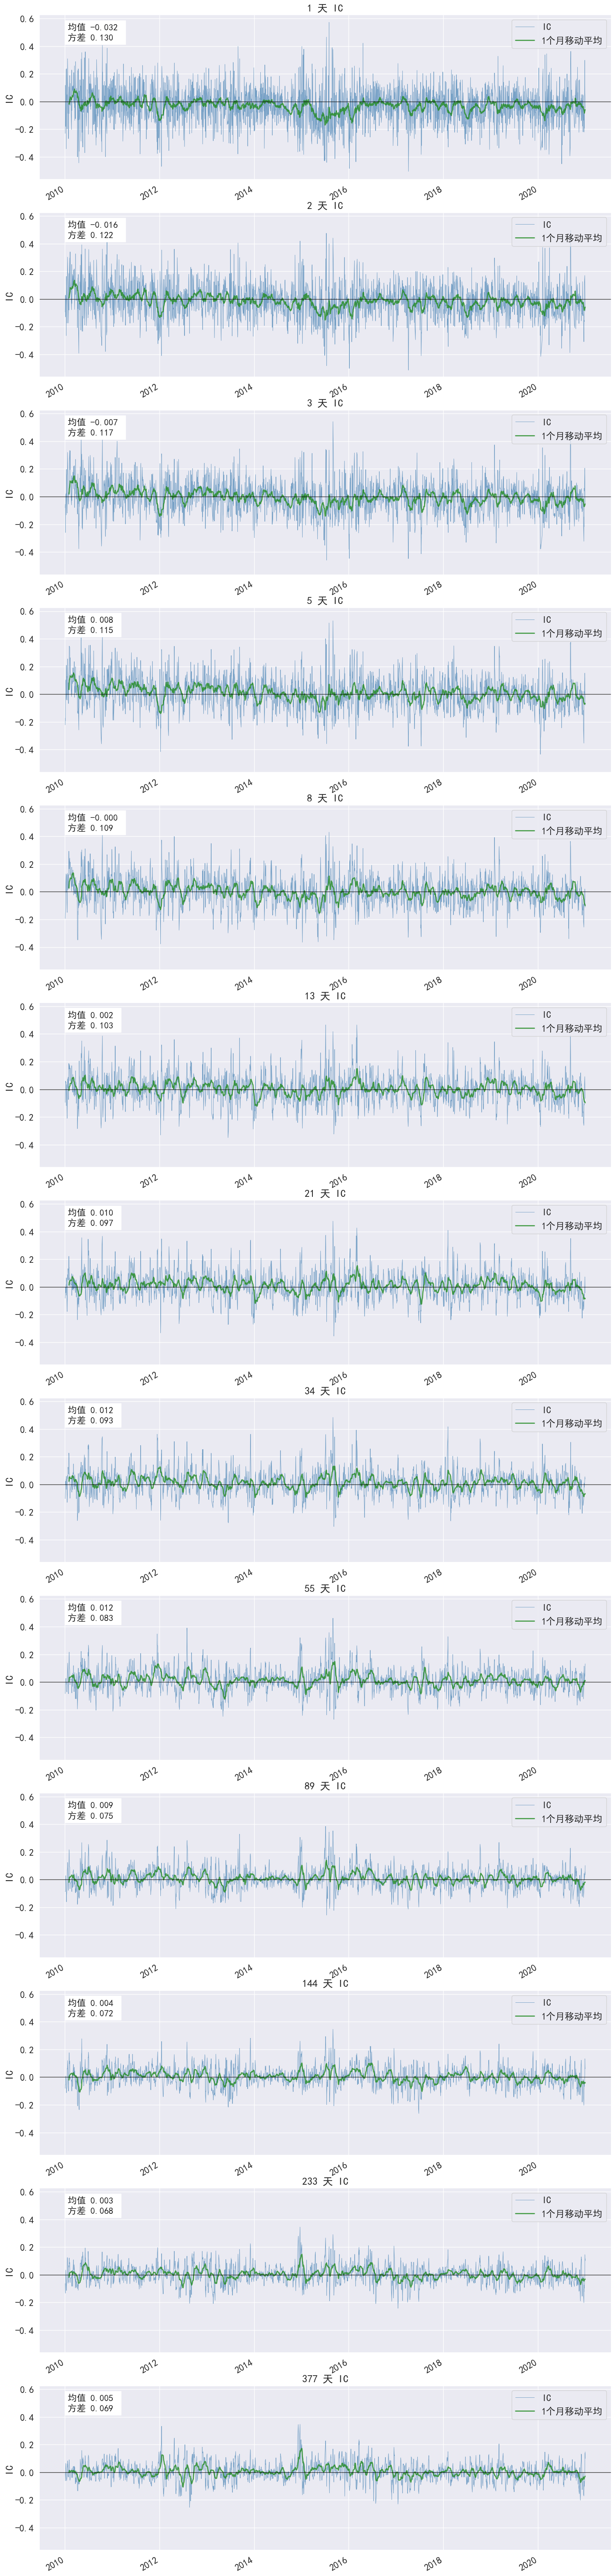

In [12]:
zy_fa.plot_norm_ic_ts()

---

#### 绘制rank_ic的时序图

<Figure size 640x480 with 0 Axes>

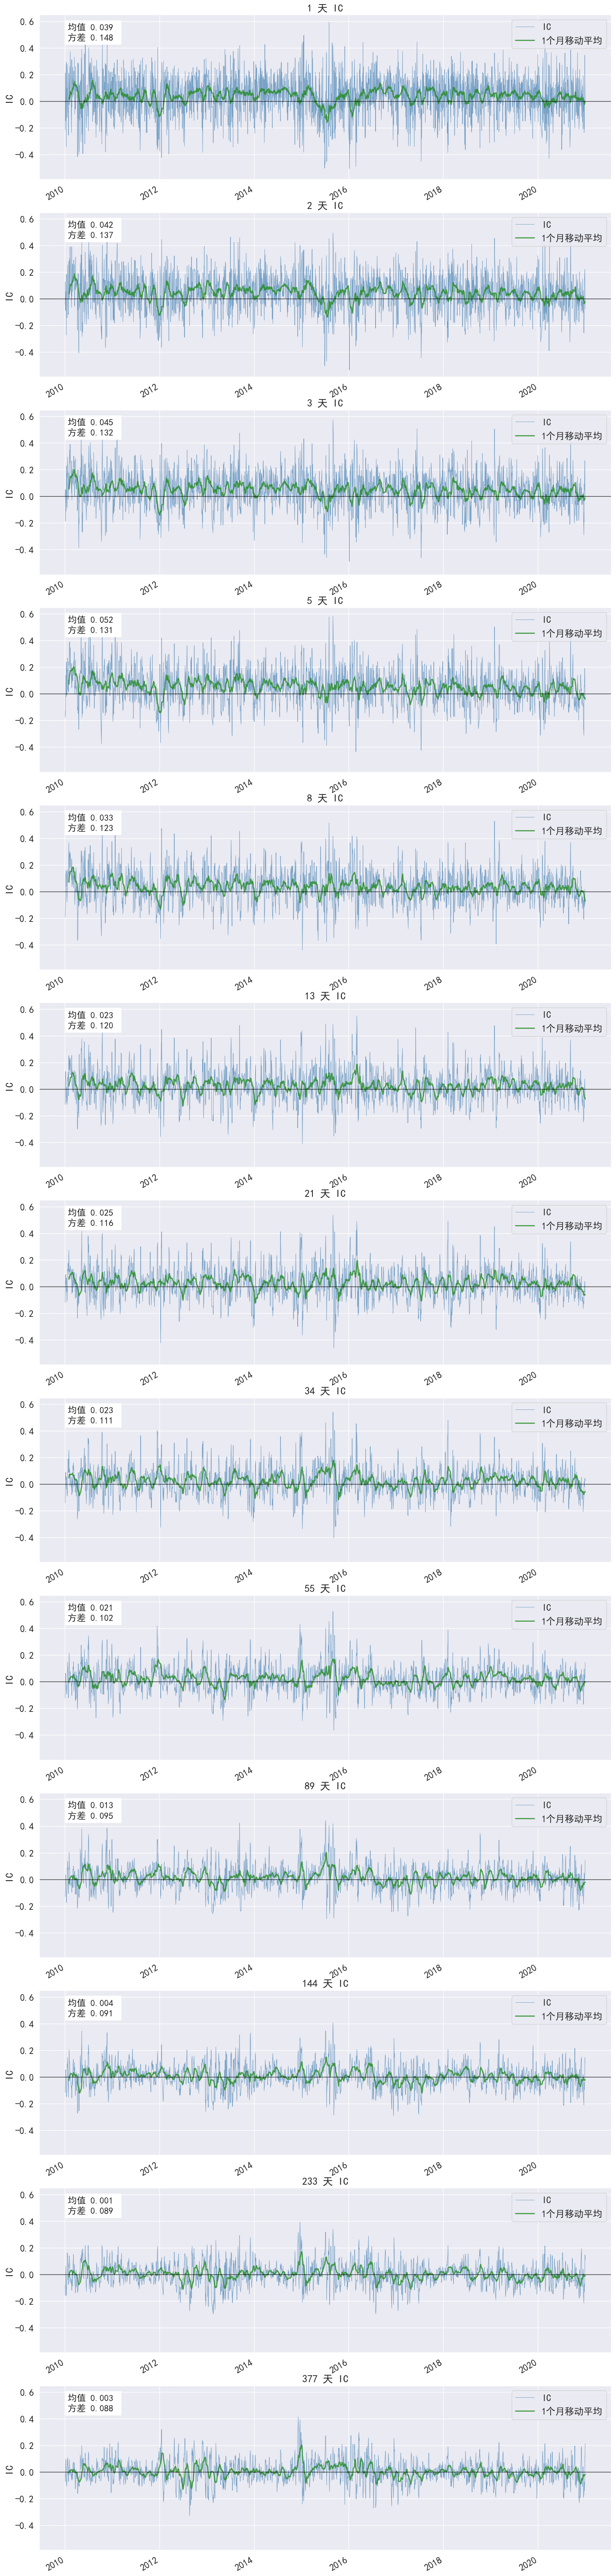

In [13]:
zy_fa.plot_rank_ic_ts()